**Python Assignment 3**

**2. Implementing Gradient Descent Algorithm (60 pts)**

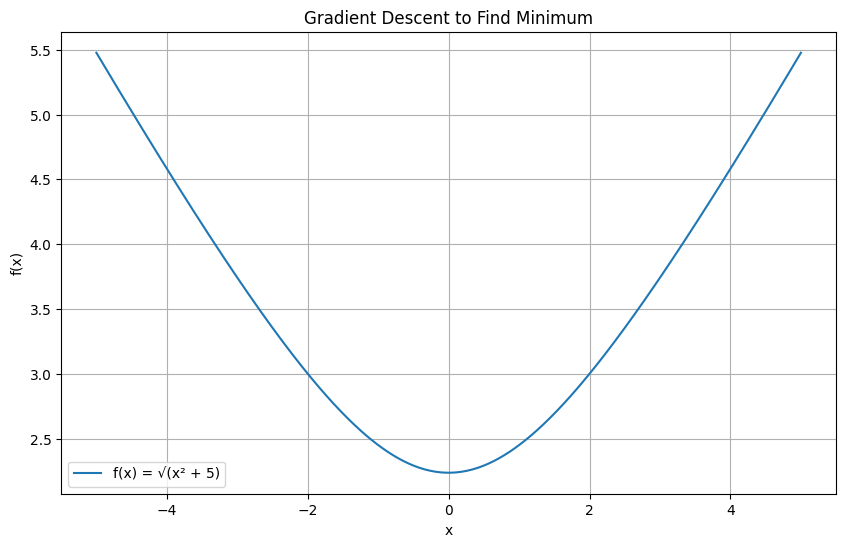

x_T after 50 iterations: 7.136039372775195e-13


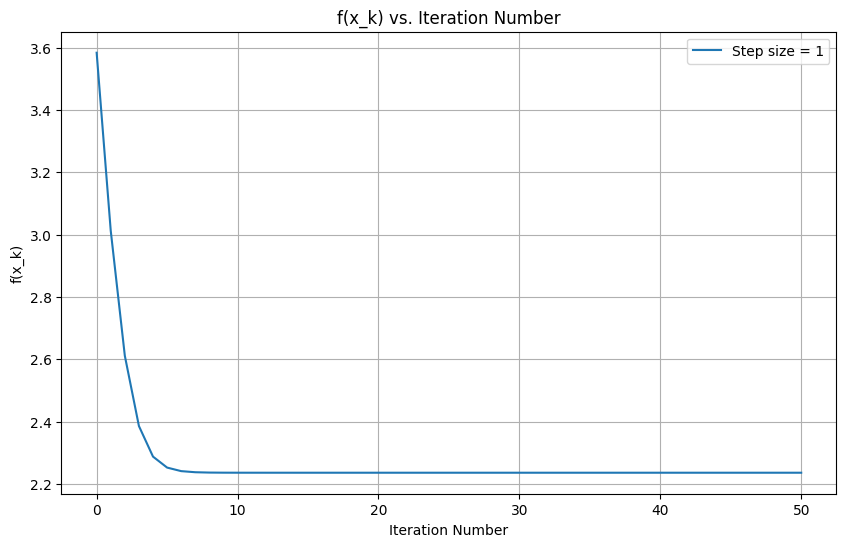

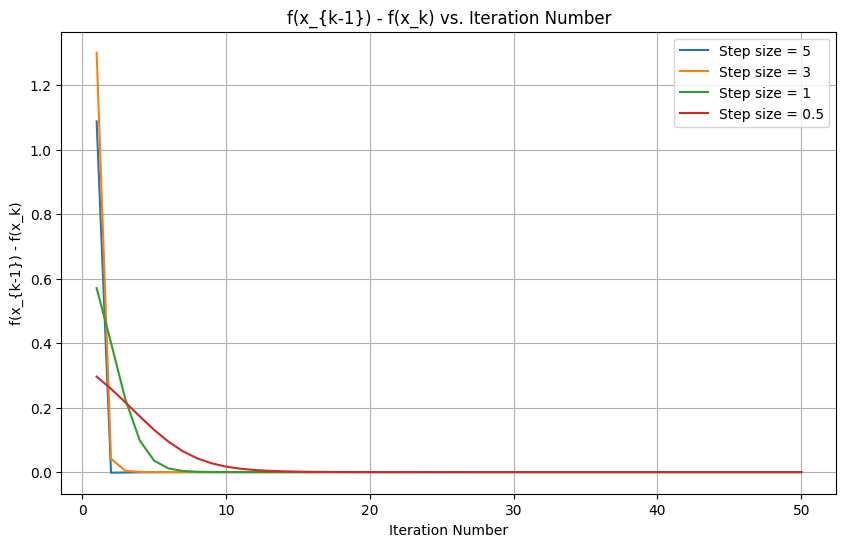

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x)
def f(x):
    return np.sqrt(x**2 + 5)

# Define the derivative of the function f(x)
def df(x):
    return x / np.sqrt(x**2 + 5)

# Plot the function f(x) over the interval [-5, 5]
x_values = np.linspace(-5, 5, 400)
y_values = f(x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='f(x) = √(x² + 5)')
plt.title('Gradient Descent to Find Minimum')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()

# Gradient Descent Algorithm
def gradient_descent(x_0, step_size, num_iterations):
    x_k = x_0
    x_values = [x_k]
    for _ in range(num_iterations):
        x_k = x_k - step_size * df(x_k)
        x_values.append(x_k)
    return x_values

# Set up initial values
x_0 = 9 / 5 + 1  # Example using last digit 9
step_size = 1
num_iterations = 50

# Run gradient descent
x_values = gradient_descent(x_0, step_size, num_iterations)

# Report x_T
x_T = x_values[-1]
print(f"x_T after {num_iterations} iterations: {x_T}")

# Plot f(x_k) vs. iteration number
f_values = [f(x) for x in x_values]
plt.figure(figsize=(10, 6))
plt.plot(range(num_iterations + 1), f_values, label=f'Step size = {step_size}')
plt.title('f(x_k) vs. Iteration Number')
plt.xlabel('Iteration Number')
plt.ylabel('f(x_k)')
plt.grid(True)
plt.legend()
plt.show()

# Create a list containing step sizes
step_sizes = [5, 3, 1, 0.5]

# Initialize a list to store the results from different step sizes
results = {}

# Loop through the step sizes and perform GD and record results
for alpha in step_sizes:
    x_values = gradient_descent(x_0, alpha, num_iterations)
    f_diffs = [f(x_values[i-1]) - f(x_values[i]) for i in range(1, len(x_values))]
    results[alpha] = f_diffs

# Plot multiple curves in a single graph
plt.figure(figsize=(10, 6))
for alpha, f_diffs in results.items():
    plt.plot(range(1, num_iterations + 1), f_diffs, label=f'Step size = {alpha}')

plt.title('f(x_{k-1}) - f(x_k) vs. Iteration Number')
plt.xlabel('Iteration Number')
plt.ylabel('f(x_{k-1}) - f(x_k)')
plt.grid(True)
plt.legend()
plt.show()


# **3. Linear Regression with Numpy and Graphing with Matplotlib (30 pts)**

Intercept: 3.6462002922929386
Coefficients: [4.11445946 0.71766113]


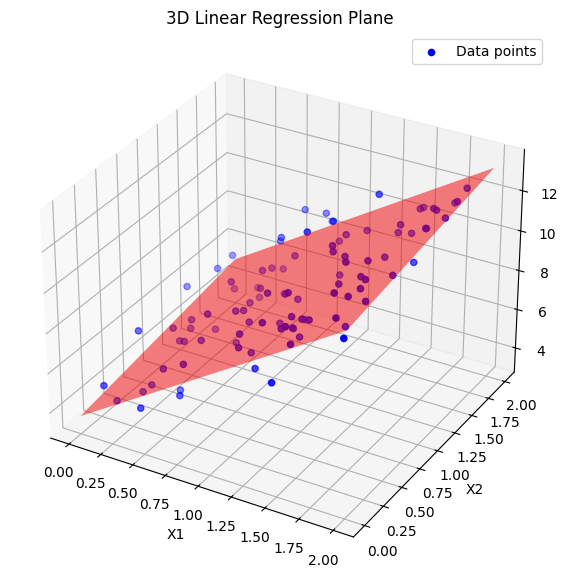

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate synthetic data
np.random.seed(21)  # change the seed to be the last two digits of your SB ID.
X = 2 * np.random.rand(100, 2)  # Generate 100 random 2D data points
y = 4 + 4 * X[:, 0] + 0.5 * X[:, 1] + np.random.randn(100)  # Generate y values with noise

# Add a column of ones to X for the bias terms (intercept) in the normal equation
X_b = np.c_[np.ones((100, 1)), X]  # Add x0 = 1 to each instance

# Find theta using the normal equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Print the intercept and coefficients of the regression plane
intercept = theta_best[0]
coefficients = theta_best[1:]
print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")

# Plot the generated data and the regression plane
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the original data points
ax.scatter(X[:, 0], X[:, 1], y, color='blue', marker='o', label='Data points')

# Create a meshgrid for plotting the regression plane
x0_surf, x1_surf = np.meshgrid(np.linspace(0, 2, 10), np.linspace(0, 2, 10))
y_surf = intercept + coefficients[0] * x0_surf + coefficients[1] * x1_surf

# Plot the regression plane
ax.plot_surface(x0_surf, x1_surf, y_surf, color='red', alpha=0.5, rstride=100, cstride=100)

# Set labels
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
ax.set_title('3D Linear Regression Plane')

plt.legend()
plt.show()

**4. Logistic Regression with Numpy and Graphing with Matplotlib (20 pts)**

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    """Compute the sigmoid function."""
    return 1 / (1 + np.exp(-z))

# Set random seed for reproducibility
np.random.seed(595)

# Generate random data points for two features
X = np.random.rand(2, 100)

# Define true weights and bias for generating labels
w_true = np.array([1.5, -2.5])
b_true = 1.0

# Calculate true probabilities using the sigmoid function
probabilities = sigmoid(np.dot(w_true.T, X) + b_true)

# Generate labels based on the probabilities
Y = (probabilities > 0.5).astype(int)

# Add noise to the data
X = X + 0.3 * np.random.rand(2, 100) - 0.1 * np.random.rand(2, 100)

# Split data into training and test sets
X_train, X_test = X[:, :80], X[:, 80:]
Y_train, Y_test = Y[:80], Y[80:]

# Initialize weights and bias for logistic regression
w = np.zeros(X.shape[0])
b = 0.0

# Set learning rate and number of epochs
learning_rate = 0.1  # Adjusted learning rate
num_epochs = 1000    # Adjusted number of epochs

# Training loop for logistic regression
for epoch in range(num_epochs):
    # Compute the predicted probabilities for the training set
    A_train = sigmoid(np.dot(w.T, X_train) + b)

    # Compute gradients for weights and bias
    dJdw = np.dot(X_train, (A_train - Y_train).T) / len(Y_train)
    dJdb = np.mean(A_train - Y_train)

    # Update weights and bias using gradient descent
    w -= learning_rate * dJdw
    b -= learning_rate * dJdb

# Compute predictions for training and test sets
A_train = sigmoid(np.dot(w.T, X_train) + b)
predictions_train = (A_train > 0.5).astype(int)

A_test = sigmoid(np.dot(w.T, X_test) + b)
predictions_test = (A_test > 0.5).astype(int)

# Calculate accuracy for training and test sets
train_accuracy = np.mean(predictions_train == Y_train)
test_accuracy = np.mean(predictions_test == Y_test)

# Print accuracy results
print(f"Training Set Accuracy: {train_accuracy:.2f}")
print(f"Test Set Accuracy: {test_accuracy:.2f}")

Training Set Accuracy: 0.88
Test Set Accuracy: 1.00


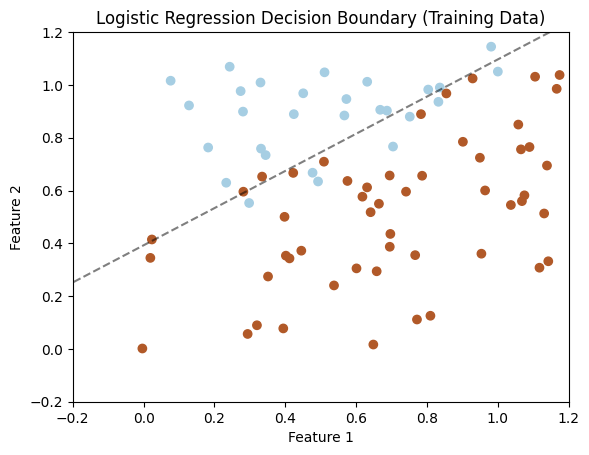

In [7]:
# Plot decision boundary for training data
plt.scatter(X[0, :80], X[1, :80], c=Y[:80], cmap=plt.cm.Paired)
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
ax = plt.gca()

# Create meshgrid for plotting decision boundary
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = np.dot(w.T, np.c_[xx.ravel(), yy.ravel()].T) + b
Z = sigmoid(Z)
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contour(xx, yy, Z, colors='k', levels=[0.5], alpha=0.5, linestyles=['--'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary (Training Data)')
plt.show()

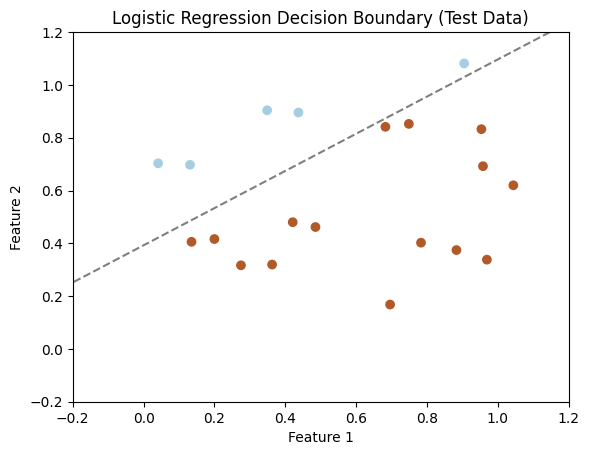

In [8]:
# Plot decision boundary for test data
plt.scatter(X[0, 80:], X[1, 80:], c=Y[80:], cmap=plt.cm.Paired)
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = np.dot(w.T, np.c_[xx.ravel(), yy.ravel()].T) + b
Z = sigmoid(Z)
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contour(xx, yy, Z, colors='k', levels=[0.5], alpha=0.5, linestyles=['--'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary (Test Data)')
plt.show()